In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mylibrary as ml

# Q1

Generate your own random numbers in range [0,1] using multiplicative linear
congruential generator defined by using (i) a = 65, m = 1021 and (ii) a = 572, m = 16381.

$$x_n = (ax_n−1) \text{~mod~} m$$

Text(0, 0.5, 'Random number')

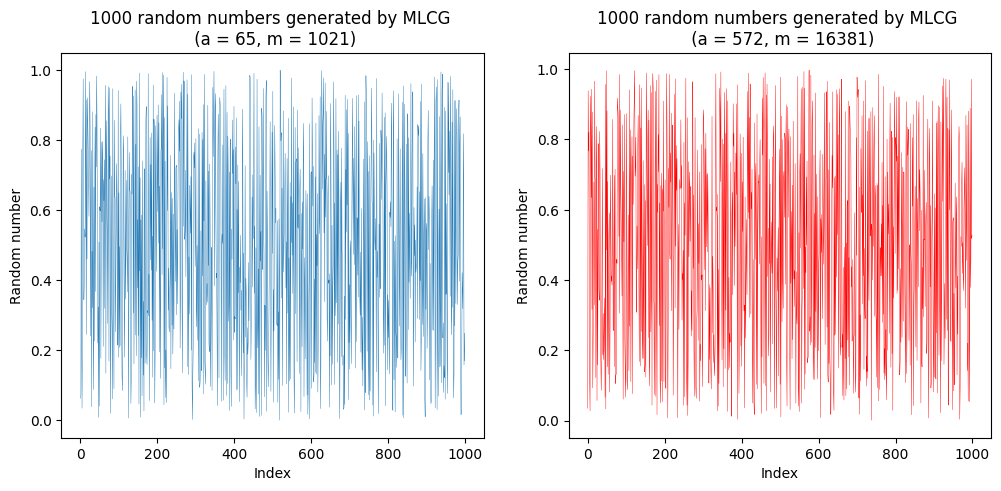

In [2]:
# (i)
random_numbers= ml.mlcg(1000, 0, 1, seed=1, a = 65, m = 1021)
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.plot(random_numbers, lw = 0.3)
plt.title('1000 random numbers generated by MLCG \n (a = 65, m = 1021)')
plt.xlabel('Index')
plt.ylabel('Random number')

# # (ii)
random_numbers = ml.mlcg(1000, 0, 1, seed=1, a = 572, m = 16381)
plt.subplot(1, 2, 2)
plt.plot(random_numbers, lw = 0.3, c='r')
plt.title('1000 random numbers generated by MLCG \n (a = 572, m = 16381)')
plt.xlabel('Index')
plt.ylabel('Random number')

# Q2

Use Monte Carlo and pRNG of Problem 1 to approximate the integral $\int_{-\pi/2}^{\pi/2} \cos(x) ~dx $
Consider N ∈ [1000, 100000] in steps of 1000 and plot the convergence.

Estimated integral: 1.999289029696328


Text(0, 0.5, 'Estimated integral')

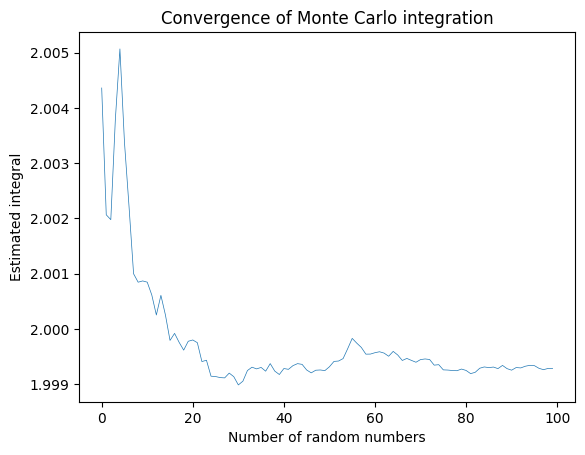

In [3]:
def f(x):
    return np.cos(x)

def p(x):  # pdf
    return 1 / (b - a)

convergence = []
a = -(np.pi)/ 2
b = (np.pi)/ 2
for h in range(1000, 100001, 1000):
    integral_estimate,_ = ml.montecarlo(f, p, a, b, h)
    convergence.append(integral_estimate)
print("Estimated integral:", integral_estimate)
plt.plot(convergence, lw = 0.5)
plt.title('Convergence of Monte Carlo integration')
plt.xlabel('Number of random numbers')
plt.ylabel('Estimated integral')

# Q3

Generate pseudo random numbers distributed as $e^{-2x}$ for 0 ≤ x ≤ 3 using
inverse transform method and accept / reject method using sampling distribution
q(x) = 2 − x, 0 ≤ x ≤ 1. Histogram the sampled RNG in both case (generate
at least 2000 RNs for the purpose).

In [4]:
import numpy as np

def generate_random_numbers(n):
    random_numbers = []
    for _ in range(n):
        u = ml.mlcg(100, 0,3)
        x = -0.5 * np.log(1-2*u)
        print(u)
        random_numbers.append(u)
    return random_numbers

random_numbers = generate_random_numbers(1000)

[0.18805093 0.22037218 2.32125367 0.87855044 0.10284035 0.68168462
 2.30656219 2.92360431 1.03134182 1.03428012 1.22526934 1.63956905
 1.56904995 2.98530852 2.04211557 0.73457395 2.74436827 1.38099902
 2.76199804 2.52693438 2.24779628 2.10381978 1.7453477  2.4446621
 2.90009794 2.50342801 0.71988247 1.78942214 2.30950049 0.11459354
 1.44564153 0.96376102 2.64152791 0.6963761  0.26150833 1.99510284
 0.67874633 2.11557297 2.5093046  1.10186092 2.61802155 2.16846229
 2.94711068 2.55925563 1.34867777 0.66111655 0.96963761 0.02350637
 1.52497551 0.12047013 1.82761998 1.79236043 2.50048972 0.52889324
 1.37512243 2.38001959 1.69833497 2.38883448 2.27130264 0.63173359
 2.05974535 1.8805093  2.2301665  0.95788443 2.25954946 2.86777669
 0.40254652 2.1625857  2.56513222 1.73065622 1.48971596 0.82859941
 2.85602351 2.63858962 0.50538688 2.84720862 2.06562194 2.26248776
 0.05876592 0.81684623 2.0920666  0.98139079 0.78746327 0.18217434
 2.83839373 1.49265426 1.01958864 0.27032321 2.56807052 1.92164

/tmp/ipykernel_727456/3946982379.py:7: RuntimeWarning: invalid value encountered in log
  x = -0.5 * np.log(1-2*u)


[0.18805093 0.22037218 2.32125367 0.87855044 0.10284035 0.68168462
 2.30656219 2.92360431 1.03134182 1.03428012 1.22526934 1.63956905
 1.56904995 2.98530852 2.04211557 0.73457395 2.74436827 1.38099902
 2.76199804 2.52693438 2.24779628 2.10381978 1.7453477  2.4446621
 2.90009794 2.50342801 0.71988247 1.78942214 2.30950049 0.11459354
 1.44564153 0.96376102 2.64152791 0.6963761  0.26150833 1.99510284
 0.67874633 2.11557297 2.5093046  1.10186092 2.61802155 2.16846229
 2.94711068 2.55925563 1.34867777 0.66111655 0.96963761 0.02350637
 1.52497551 0.12047013 1.82761998 1.79236043 2.50048972 0.52889324
 1.37512243 2.38001959 1.69833497 2.38883448 2.27130264 0.63173359
 2.05974535 1.8805093  2.2301665  0.95788443 2.25954946 2.86777669
 0.40254652 2.1625857  2.56513222 1.73065622 1.48971596 0.82859941
 2.85602351 2.63858962 0.50538688 2.84720862 2.06562194 2.26248776
 0.05876592 0.81684623 2.0920666  0.98139079 0.78746327 0.18217434
 2.83839373 1.49265426 1.01958864 0.27032321 2.56807052 1.92164

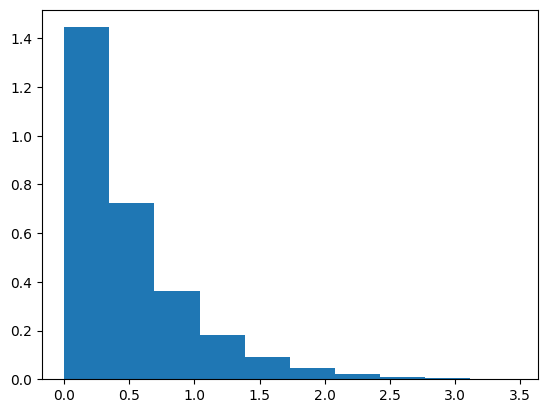

In [5]:
# Define the inverse of the CDF of the exponential distribution
def inverse_func(u):
    return -np.log(1 - 2*u) / 2

uniform_samples = ml.mlcg(10000, 0, 1)/2

# scaled_random_numbers = 3* random_numbers
random_numbers = inverse_func(uniform_samples)

plt.hist(random_numbers, bins=10, density=True);

def generate_accept_reject(n_samples):
    random_numbers = []
    M = 1  # M is chosen such that f(x) <= M*q(x) for all x in [0, 3]
    while len(random_numbers) < n_samples:
        x_candidate = np.random.uniform(0, 3)  # Sample from the interval [0, 3]
        if np.random.rand() <= f(x_candidate) / (M * q(x_candidate)):
            random_numbers.append(x_candidate)
    return np.array(random_numbers)

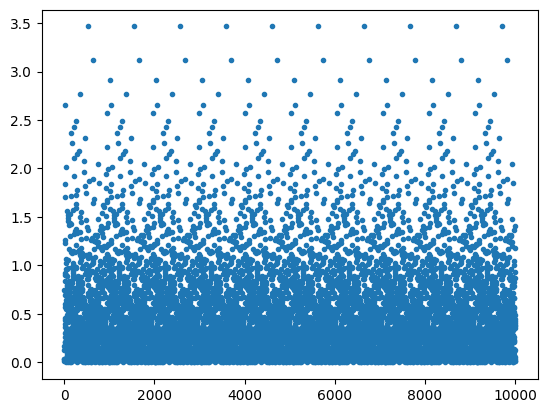

In [6]:
plt.plot(np.linspace(0, 10000, 10000), random_numbers, '.')

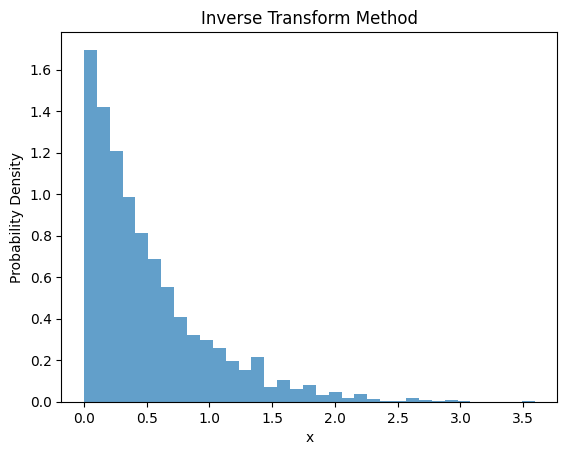

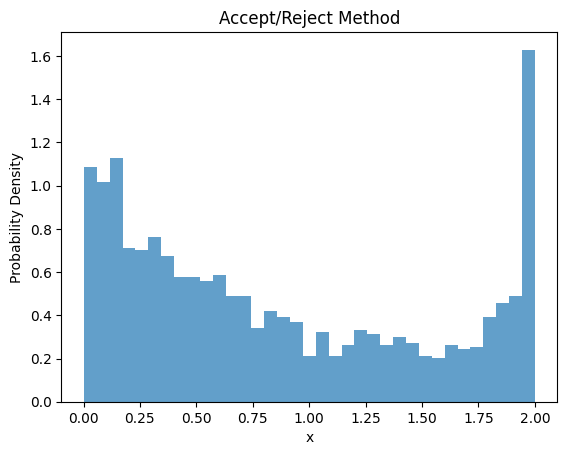

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Probability density function f(x) = exp(-2x)
def f(x):
    return np.exp(-2 * x)

# Sampling distribution q(x) = 2 - x
def q(x):
    return 2 - x

# Inverse of the CDF of f(x)
def inverse_exp_cdf(u, lambd=2):
    return -np.log(1 - u) / lambd

# Generate random numbers using inverse transform method
def generate_inverse_transform(n_samples):
    uniform_samples = np.random.rand(n_samples)
    random_numbers = inverse_exp_cdf(uniform_samples)
    return random_numbers

# Accept/reject method to generate random numbers
def generate_accept_reject(n_samples):
    random_numbers = []
    M = 1  # M is chosen such that f(x) <= M*q(x) for all x in [0, 3]
    while len(random_numbers) < n_samples:
        x_candidate = np.random.uniform(0, 3)  # Sample from the interval [0, 3]
        if np.random.rand() <= f(x_candidate) / (M * q(x_candidate)):
            random_numbers.append(x_candidate)
    return np.array(random_numbers)

# Histogram the sampled RNG
def plot_histogram(random_numbers, title):
    plt.hist(random_numbers, bins=35, density=True, alpha=0.7)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.show()

# Number of random numbers to generate
n_samples = 2000

# Generate random numbers using inverse transform method
random_numbers_inverse_transform = generate_inverse_transform(n_samples)
plot_histogram(random_numbers_inverse_transform, 'Inverse Transform Method')

# Generate random numbers using accept/reject method
random_numbers_accept_reject = generate_accept_reject(n_samples)
plot_histogram(random_numbers_accept_reject, 'Accept/Reject Method')


# Q4

Use Monte Carlo to evaluate the integral (taking N = 10000)
$$\int_0^2\frac{e^{-2x}}{1+x^2}~dx$$

with the following importance sampling functions and comment on the variance
reduction that may be achieved.

$$p_1(x) = 0.5,~0 < x < 2 $$
$$p_2(x) = e^{−x},~~ x > 0 $$
$$p_3(x) = \frac{e^{−x/2}}{2(1 − e^{−1/2})}, ~~0 < x < 2 $$

In [8]:
def f(x):
    return ( np.exp(-2*x) )/ ( 1 + x**2)

def p(x):  # pdf
    return 0.5

# convergence = []
a = 0
b = 2
h=100000

integral_estimate, var = ml.montecarlo(f, p, a, b, h)
    # convergence.append(integral_estimate)
print("Estimated integral:", integral_estimate)
print("Variance of the estimate:", var)


Estimated integral: 0.3989769764962279
Variance of the estimate: 0.3279696771238518


In [9]:
def p(x):  # pdf
    return np.exp(-x)

# convergence = []
a = 0
b = 2
h=100000

integral_estimate, var = ml.montecarlo(f, p, a, b, h)
    # convergence.append(integral_estimate)
print("Estimated integral:", integral_estimate)
print("Variance of the estimate:", var)

Estimated integral: 0.3033343074067281
Variance of the estimate: 0.3279696771238518


In [10]:
def p(x):  # pdf
    return np.exp(-x/2)/ (2 * (1-np.exp(-1/2)) )

# convergence = []
a = 0
b = 2
h=100000

integral_estimate, var = ml.montecarlo(f, p, a, b, h)
    # convergence.append(integral_estimate)
print("Estimated integral:", integral_estimate)
print("Variance of the estimate:", var)

Estimated integral: 0.19020342480992472
Variance of the estimate: 0.3279696771238518
